In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('fivethirtyeight') # plot theme setting
import warnings
warnings.filterwarnings('ignore') # ignore ignore
%matplotlib inline

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
# from xgboost import XGBRegressor

In [3]:
# load data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
# check for null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:19])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [5]:
train.describe() # Numeral characteristic

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.select_dtypes(exclude=[np.number]).describe() # Nonnumeric feature

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
print (train.enc_street.value_counts())

1    1454
0       6
Name: enc_street, dtype: int64


In [8]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n') # most positively correlated
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) # most negatively correlated

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


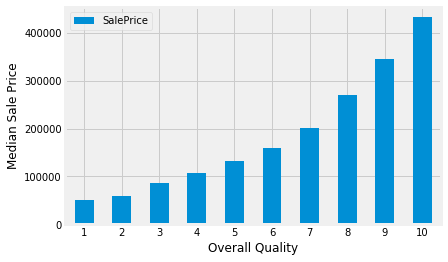

In [9]:
# overall quality (discrete) - saleprice
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# 结果：成正比

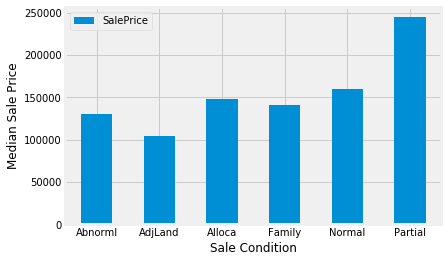

In [10]:
# sale condition (discrete) - saleprice
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# 结果：partial的房价明显高于其他

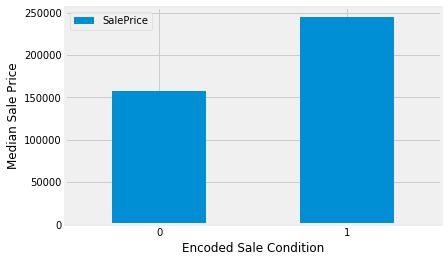

In [11]:
# 对sale condition进行编码
def encodeSaleCond(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encodeSaleCond)
test['enc_condition'] = test.SaleCondition.apply(encodeSaleCond)

# sale condition (discrete, encoded) - saleprice
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [12]:
# 同理对SaleType进行编码
def encodeSaleType(x):
 return 1 if x == 'Con' or x == 'New' else  0
train['enc_type'] = train.SaleType.apply(encodeSaleType)
test['enc_type'] = test.SaleType.apply(encodeSaleType)

# 同理对MiscFeature进行编码
def encodeMisc(x):
 return 1 if x == 'TenC' else 0
train['enc_misc'] = train.MiscFeature.apply(encodeMisc)
test['enc_misc'] = test.MiscFeature.apply(encodeMisc)

def encodeEx(x):
 return 1 if x == 'Ex' else 0

# 同理对PoolQC进行编码
train['enc_pool'] = train.PoolQC.apply(encodeEx)
test['enc_pool'] = test.PoolQC.apply(encodeEx)

# 同理对FireplaceQu进行编码
train['enc_fire'] = train.FireplaceQu.apply(encodeEx)
test['enc_fire'] = test.FireplaceQu.apply(encodeEx)

# 同理对KitchenQual进行编码
train['enc_kitchen'] = train.KitchenQual.apply(encodeEx)
test['enc_kitchen'] = test.KitchenQual.apply(encodeEx)

# 同理对HeatingQC进行编码
train['enc_heating'] = train.HeatingQC.apply(encodeEx)
test['enc_heating'] = test.HeatingQC.apply(encodeEx)

# 同理对BsmtQual进行编码
train['enc_BsmtQual'] = train.BsmtQual.apply(encodeEx)
test['enc_BsmtQual'] = test.BsmtQual.apply(encodeEx)

def encodeTA(x):
    return 1 if x == 'Gd' or x == 'Ex' or x == 'TA' else 0

# 同理对BsmtCond进行编码
train['enc_BsmtCond'] = train.BsmtCond.apply(encodeTA)
test['enc_BsmtCond'] = test.BsmtCond.apply(encodeTA)

# 同理对ExterCond进行编码
train['enc_ExterCond'] = train.ExterCond.apply(encodeTA)
test['enc_ExterCond'] = test.ExterCond.apply(encodeTA)


# 同理对PavedDrive进行编码
def encodeDrive(x):
    if x == 'Y': return 2
    if x == 'P': return 1
    else: return 0
train['enc_drive'] = train.PavedDrive.apply(encodeDrive)
test['enc_drive'] = test.PavedDrive.apply(encodeDrive)

# 同理对GarageFinish进行编码
def encodeGarage(x):
    if x == 'Fin': return 2
    if x == 'RFn': return 1
    else: return 0
train['enc_garage'] = train.GarageFinish.apply(encodeGarage)
test['enc_garage'] = test.GarageFinish.apply(encodeGarage)

# 同理对Electrical进行编码
def encodeElectrical(x):
    return 1 if x == 'SBrkr' else 0
train['enc_electrical'] = train.Electrical.apply(encodeElectrical)
test['enc_electrical'] = test.Electrical.apply(encodeElectrical)

# 同理对Electrical进行编码
def encodeBsmtFinType1(x):
    return 1 if x == 'GLQ' else 0
train['enc_BsmtFinType1'] = train.BsmtFinType1.apply(encodeBsmtFinType1)
test['enc_BsmtFinType1'] = test.BsmtFinType1.apply(encodeBsmtFinType1)

# 同理对Foundation进行编码
def encodeFoundation(x):
    return 1 if x == 'PConc' else 0
train['enc_foundation'] = train.Foundation.apply(encodeFoundation)
test['enc_foundation'] = test.Foundation.apply(encodeFoundation)

# 同理对ExterQual进行编码
def encodeExterQual(x):
    if x == 'Ex': return 3
    if x == 'Gd': return 2
    if x == 'TA': return 1
    else: return 0
train['enc_ExterQual'] = train.ExterQual.apply(encodeExterQual)
test['enc_ExterQual'] = test.ExterQual.apply(encodeExterQual)

# 同理对MasVnrType进行编码
def encodeMasVnrType(x):
    return 1 if x == 'Stone' else 0
train['enc_MasVnrType'] = train.MasVnrType.apply(encodeMasVnrType)
test['enc_MasVnrType'] = test.MasVnrType.apply(encodeMasVnrType)

# 同理对OverallCond进行编码
def encodeOverallCond(x):
    return 1 if x>=5 else 0
train['enc_OverallCond'] = train.OverallCond.apply(encodeOverallCond)
test['enc_OverallCond'] = test.OverallCond.apply(encodeOverallCond)


# 同理对Condition2进行编码
def encodeCondition2(x):
    return 1 if x=='PosA' or x=='PosN' else 0
train['enc_Condition2'] = train.Condition2.apply(encodeCondition2)
test['enc_Condition2'] = test.Condition2.apply(encodeCondition2)

# 同理对LandContour进行编码
def encodeLandContour(x):
    if x == 'HLS': return 3
    if x == 'Low': return 2
    if x == 'Lvl': return 1
    else: return 0
train['enc_LandContour'] = train.LandContour.apply(encodeLandContour)
test['enc_LandContour'] = test.LandContour.apply(encodeLandContour)

# 同理对Alley进行编码
def encodeAlley(x):
    return 1 if x=='Pave' else 0
train['enc_Alley'] = train.Alley.apply(encodeAlley)
test['enc_Alley'] = test.Alley.apply(encodeAlley)

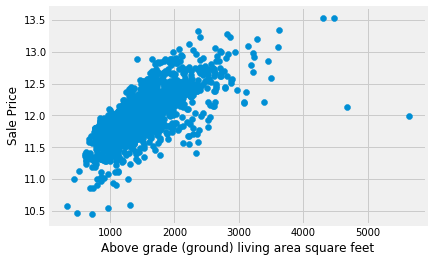

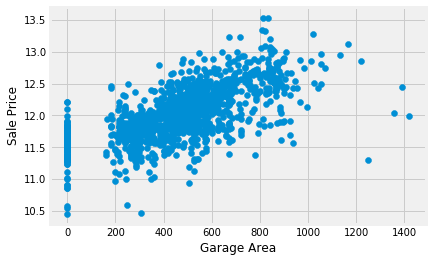

In [13]:
# groud living area - log(saleprice)
plt.scatter(x=train['GrLivArea'], y=np.log(train['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

# garage area - log(saleprice)
plt.scatter(x=train['GarageArea'], y=np.log(train['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [14]:
# 用平均值填补空值
full_train = train.select_dtypes(include=[np.number]).interpolate().dropna()
full_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,enc_garage,enc_electrical,enc_BsmtFinType1,enc_foundation,enc_ExterQual,enc_MasVnrType,enc_OverallCond,enc_Condition2,enc_LandContour,enc_Alley
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,...,0.771233,0.913699,0.286301,0.443151,1.39589,0.087671,0.939726,0.002055,1.050000,0.028082
std,421.610009,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,...,0.811835,0.280905,0.452187,0.496928,0.57428,0.282913,0.238075,0.045299,0.449926,0.165264
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,1.000000,1.000000,1.000000,1.000000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,2.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,3.000000,1.000000


In [15]:
# 建立模型
y = np.log(train.SalePrice)
X = full_train.drop(['SalePrice','Id'], axis=1)

In [16]:
# # X = full_train.drop(['SalePrice','Id','SaleType','MiscFeature','PoolQC','FirePlaceQu','KitchenQual','HeatingQC','BsmtQUal','BsmtCond','ExterCond','PavedDrive','GarageFinish','Electrical','BsmtFinType1','Foundation','ExterQual','OverallCond','Condition2','LandContour','Alley'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [17]:
model = lr.fit(X_train, y_train)

In [18]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.02481730783342834


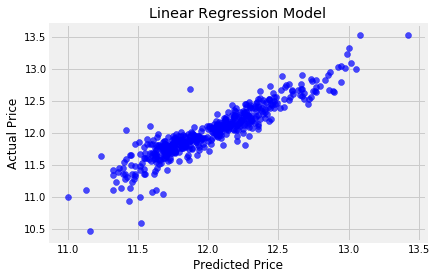

In [19]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

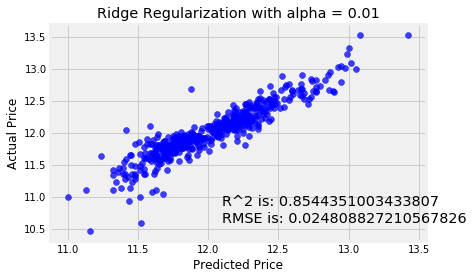

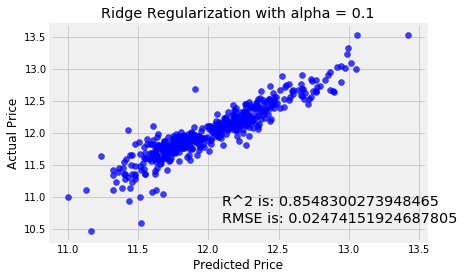

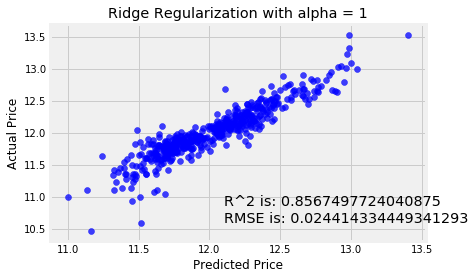

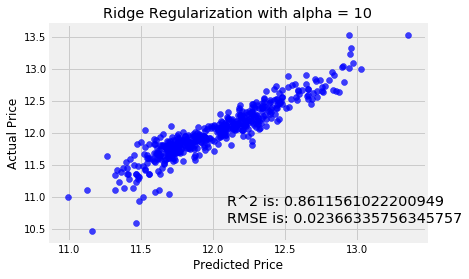

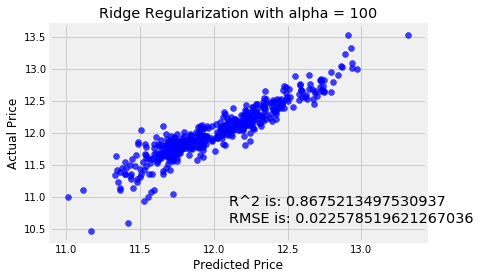

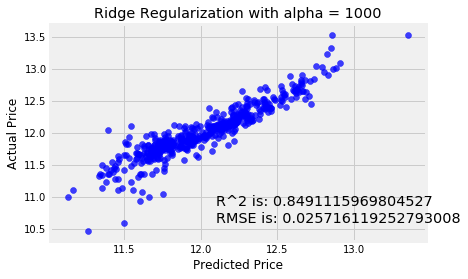

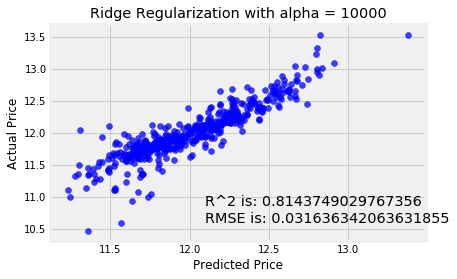

In [24]:
for i in range (-2, 5):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [25]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()
feats.head()
rm = linear_model.Ridge(alpha=100)
ridge_model = rm.fit(X_train, y_train)
predictions = ridge_model.predict(feats)
final_predictions = np.exp(predictions)
print ("Final predictions are: \n", final_predictions[:5])

Final predictions are: 
 [127682.26616969 117111.09256395 173831.29239902 200055.9417484
 193774.6248799 ]


In [26]:
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('submission1.csv', index=False)